In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os
from pathlib import Path
import random 

Using TensorFlow backend.


# Data Preprocessing


In [2]:
p = Path('/home/vasu-gupta/Downloads/dataset/dataset/')

image_data = []
image_labels =[]
name_to_label = {}
label_to_name = {}
label_count = 0
img_count = 0

for dirs in p.glob('*'):
    
#     print(dirs)
    name = str(dirs).split('/')[-1]
    name = name.lower()
    name_to_label[name] = label_count
    label_to_name[label_count] = name
       
    for img in dirs.glob('*.jpg'):
        img_d = image.load_img(img,target_size=(32,32))
        data = image.img_to_array(img_d)
        image_data.append(data)
        image_labels.append(label_count)
        img_count+=1
    
    
    print(label_count,end=' ')
    label_count+=1
    

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 

In [3]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils

In [4]:
print(type(image_data),type(image_labels))

<class 'list'> <class 'list'>


In [5]:
image_data = np.array(image_data)
image_data = image_data/255.0
image_labels = np.array(image_labels)

combined = list(zip(image_data,image_labels))
random.shuffle(combined)

image_data[:],image_labels[:] = zip(*combined)
print(image_data.shape,image_labels.shape)


(10118, 32, 32, 3) (10118,)


In [6]:
image_labels = np_utils.to_categorical(image_labels)

In [7]:
print(image_data.shape,image_labels.shape)

(10118, 32, 32, 3) (10118, 151)


# CNN MODEL

In [18]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (32,32,3)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation = 'relu'))
model.add(Flatten())
model.add(Dense(151,activation = 'softmax'))

In [22]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics = ["accuracy"])

In [23]:
hist = model.fit(image_data,image_labels,epochs=50,validation_split = 0.2)

Train on 8094 samples, validate on 2024 samples
Epoch 1/50
8094/8094 [==============================] - 11s 1ms/step - loss: 3.5742 - acc: 0.2123 - val_loss: 5.4721 - val_acc: 0.0341
Epoch 2/50
8094/8094 [==============================] - 11s 1ms/step - loss: 2.7539 - acc: 0.3220 - val_loss: 6.5425 - val_acc: 0.0356
Epoch 3/50
8094/8094 [==============================] - 11s 1ms/step - loss: 2.3685 - acc: 0.3745 - val_loss: 6.6380 - val_acc: 0.0321
Epoch 4/50
8094/8094 [==============================] - 11s 1ms/step - loss: 2.1014 - acc: 0.4144 - val_loss: 6.4603 - val_acc: 0.0292
Epoch 5/50
8094/8094 [==============================] - 11s 1ms/step - loss: 1.9324 - acc: 0.4266 - val_loss: 6.7475 - val_acc: 0.0306
Epoch 6/50
8094/8094 [==============================] - 11s 1ms/step - loss: 1.8166 - acc: 0.4327 - val_loss: 6.9185 - val_acc: 0.0311
Epoch 7/50
8094/8094 [==============================] - 11s 1ms/step - loss: 1.7080 - acc: 0.4492 - val_loss: 6.8287 - val_acc: 0.0301
Epoch 8

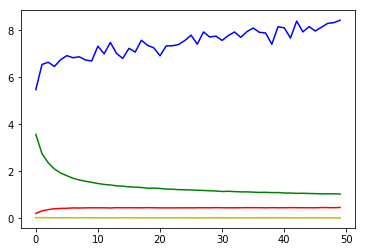

In [25]:
plt.figure()
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'y')
plt.show()
